# Research on customer interaction and retention

> to develop a customer interaction and retention strategy based on analytical data.

**Introduction:** In the research conducted, a binary classification model was built to predict customer churn. Additionally, customer clusters are analyzed to see which are prone to leaving or are loyal to the gym chain of interest.

## Open the data file and study the general information

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

plotColor = ['b','g','r','m','c', 'y']

In [2]:
try:
    gym = pd.read_csv(
        '/datasets/gym_churn_us.csv',
    sep=',')
except:
    gym = pd.read_csv(
        'gym_churn_us.csv',
    sep=',')

In [3]:
gym.info(memory_usage='deep')
gym.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


### Conclusion

There are 13 features and all of the features are numeric. There are no discernible missing values.

## Exploratory data analysis

In [4]:
# checking for duplicates
print('gym duplicates:')
print(gym.duplicated().sum())

gym duplicates:
0


In [5]:
# studying the mean and std for each feature
gym.describe(include='all')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
# stuyding the mean feature values for those who left (churn) and for those who stayed
gym.groupby('Churn').describe()

gender                                              Near_Location  \
        count      mean       std  min  25%  50%  75%  max         count   
Churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                 ... Avg_class_frequency_total            \
           mean  ...                       75%       max   
Churn            ...                                       
0      0.873086  ...                  2.732944  6.023668   
1      0.768143  ...                  1.956438  3.478646   

      Avg_class_frequency_current_month                                     \
                                  count      mean       std  min       25%   
Churn                                                                        
0                                2939.0  2.027882  1.018994  0.0  1.297021   
1                                1061.0  1.044546  0.770237  0.0  0.421337   

                                     
            50%       75%       max  
Churn                                
0      2.046697  2.740648  6.146783  
1      0.979445  1.588576  3.540271  

[2 rows x 104 columns]

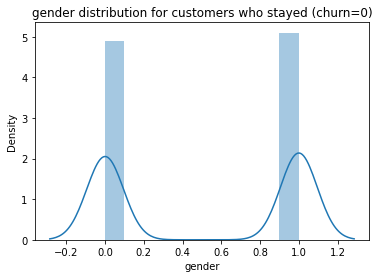

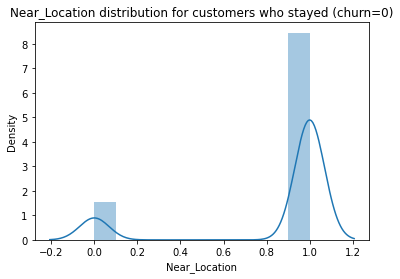

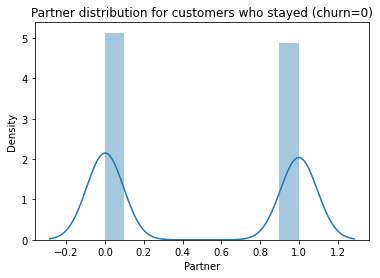

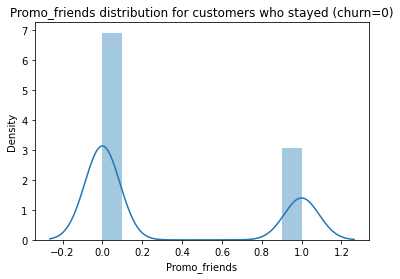

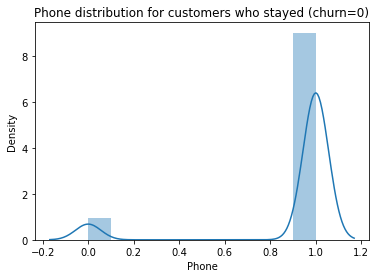

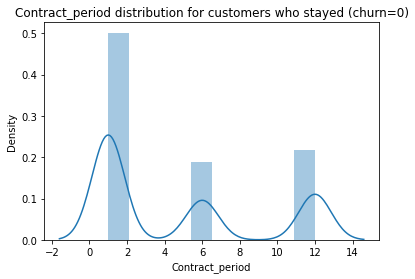

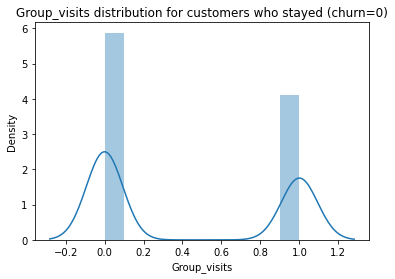

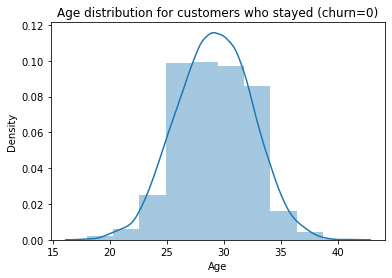

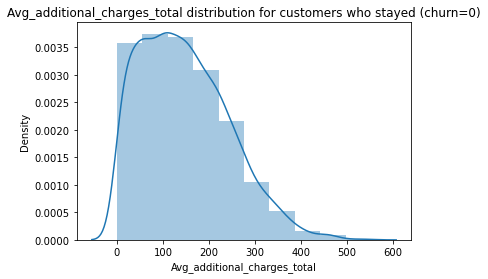

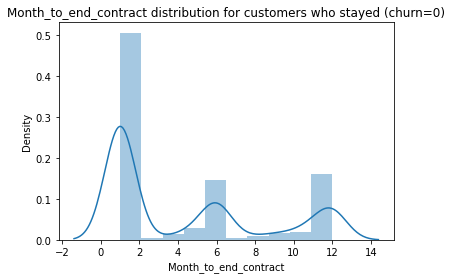

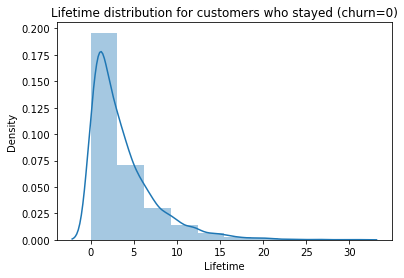

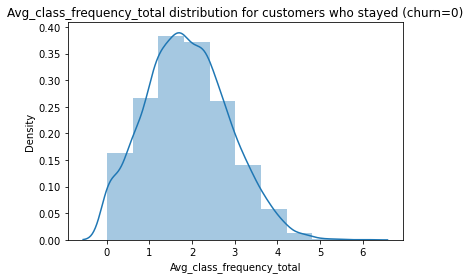

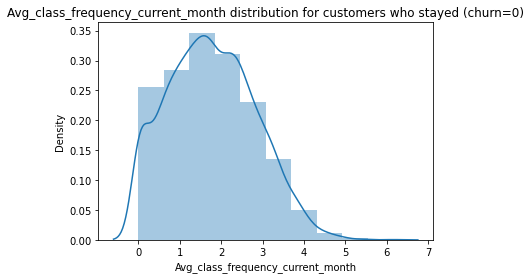

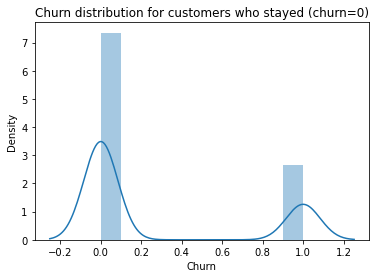

In [7]:
# plotting bar histograms and feature distributions for customers who stayed
for feature in gym[gym['Churn']==0]:
    sns.distplot(gym[feature], bins = 10)
    plt.title('{} distribution for customers who stayed (churn=0)'.format(feature))
    plt.show()

#### **Figure 1. For customers who stayed, a bimodal distribution can be observed in the following features: gender, Near_Location, Partner, Promo_friends, Phone, Group_visits. A multimodal distribution is observed in Contract_period and Month_to_end_contract. A somewhat normal distribution is observed in Age and Avg_class_frequency_total. And the following features display a right-skewed distribution: Avg_additional_charges_total, Lifetime, Avg_class_frequency_current_month.**

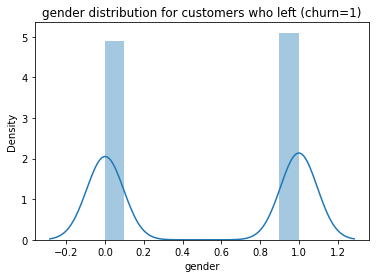

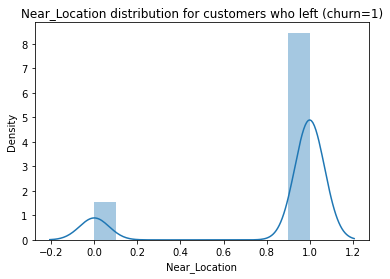

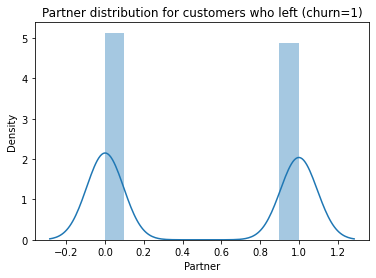

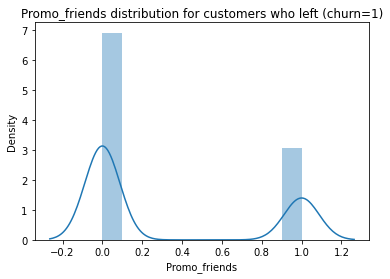

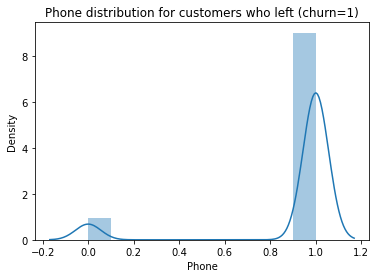

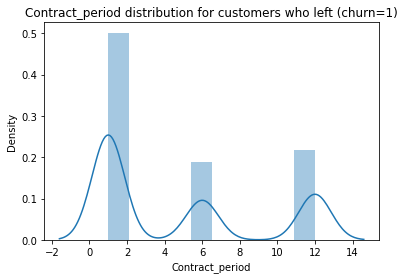

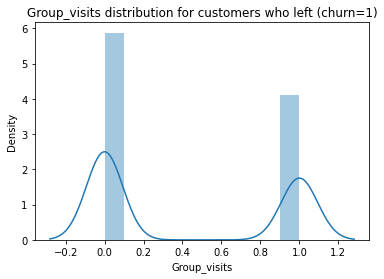

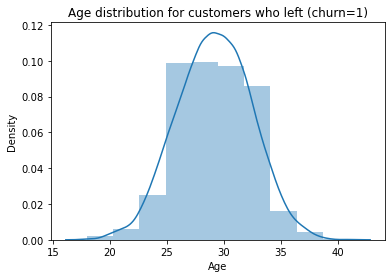

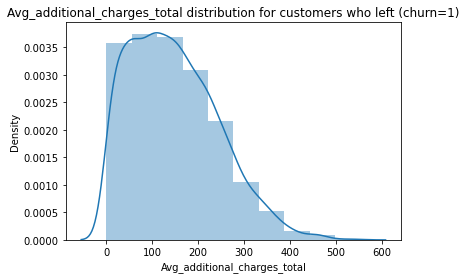

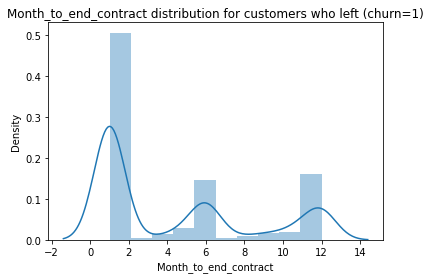

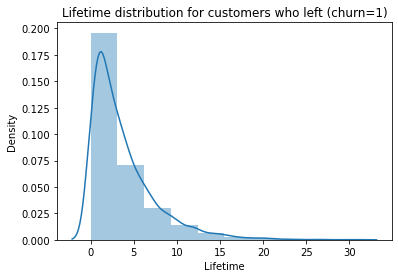

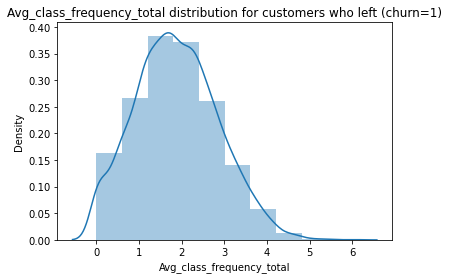

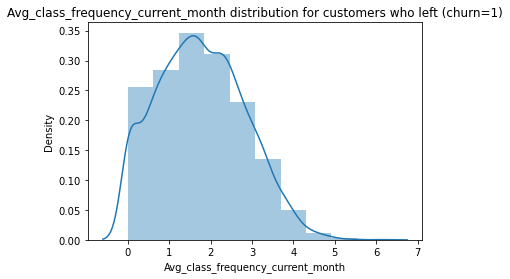

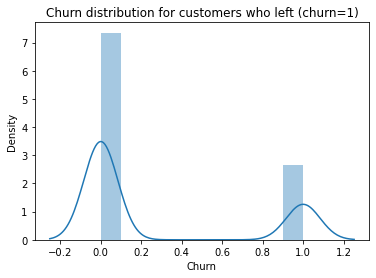

In [8]:
# plotting bar histograms and feature distributions for customers who left (churn)
for feature in gym[gym['Churn']==1]:
    sns.distplot(gym[feature], bins = 10)
    plt.title('{} distribution for customers who left (churn=1)'.format(feature))
    plt.show()

#### **Figure 2. For customers who left, a bimodal distribution can be observed in the following features: gender, Near_Location, Partner, Promo_friends, Phone, Group_visits. A multimodal distribution is observed in Contract_period and Month_to_end_contract. A somewhat normal distribution is observed in Age. And the following features display a right-skewed distribution: Avg_additional_charges_total, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month.**

In [9]:
# calculating the correlation matrix
gym_cm = gym.corr()
gym_cm

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


### Conclusion

The feature distribution patterns are mostly similar between customers who stayed and left except for the customers who stayed have two features exhibited a somewhat normal distribution (Age and Avg_class_frequency_total) and the customers who left have only Age displaying the aforementioned distribution. As for correlations, there are no strongly correlated features with customer churn. All features except gender are negatively correlated with the target variable.

## Build a model to predict customer churn

In [10]:
# divide the data into features (the X matrix) and a target variable (y)
X = gym.drop('Churn', axis=1) 
y = gym['Churn'] #target variable

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define the model's algorithms for logistic regression and random forest
lr_model = LogisticRegression(random_state=0)
rf_model = RandomForestClassifier(random_state=0)

# training model
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# binary prediction
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [11]:
# evaluating accuracy, precision, and recall for logistic regression model
print('Evaluating accuracy, precision, and recall for logistic regression model:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Evaluating accuracy, precision, and recall for logistic regression model:
Accuracy: 0.91
Precision: 0.82
Recall: 0.80


In [12]:
# evaluating accuracy, precision, and recall for random forest model
print('Evaluating accuracy, precision, and recall for random forest model:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Evaluating accuracy, precision, and recall for random forest model:
Accuracy: 0.92
Precision: 0.84
Recall: 0.82


### Conclusion

Upon comparing the logistic regression and random forest models, the model that gave slightly better results is random forest with 92% accuracy, 84% precision, and 82% recall. The logistic regression model yielded 91% accuracy, 82% precision, and 80% recall.

## Create customer clusters

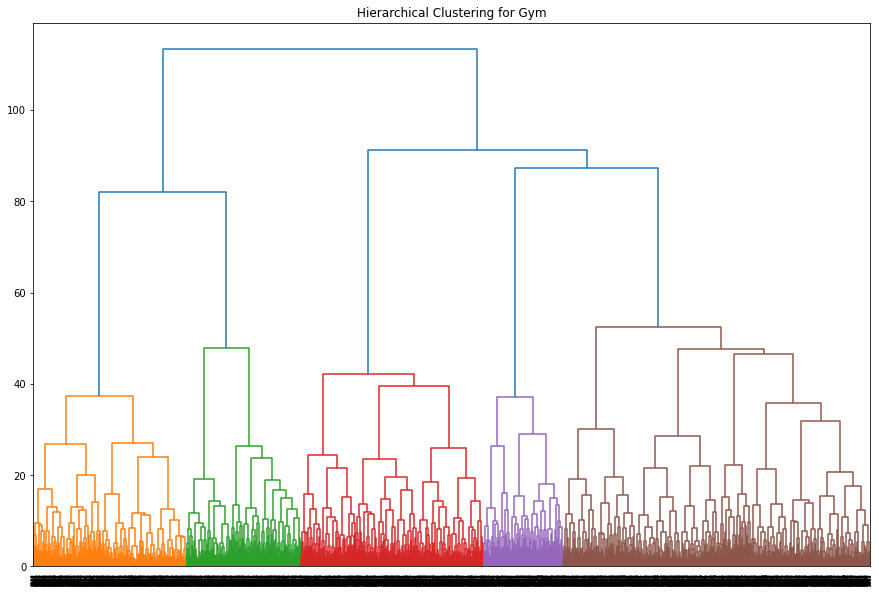

In [13]:
# obligatory standardization of data before passing it to the algorithm
scaler = StandardScaler()
X_sc = scaler.fit_transform(gym)

linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering for Gym')
plt.show()

In [14]:
# define the k_means model 
km = KMeans(n_clusters = 5)

# predict the clusters for observations
labels = km.fit_predict(X_sc)

# store cluster labels in the field of dataset
gym['cluster_km'] = labels

# get the statistics of the mean feature values per cluster
gym.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.514034,0.999198,0.337610,0.219727,1.0,2.298316,0.448276,30.176423,160.280025,2.162791,4.867682,2.123560,2.125643,0.003208
1,0.507380,0.955720,0.784133,0.579336,1.0,10.671587,0.548893,29.903137,160.191701,9.714945,4.636531,2.012441,2.007485,0.013838
2,0.499033,0.000000,0.462282,0.077369,1.0,2.292070,0.216634,28.564797,136.165668,2.160542,2.843327,1.732190,1.554870,0.433269
3,0.509138,1.000000,0.332898,0.227154,1.0,1.647520,0.284595,26.912533,115.138263,1.595300,1.060052,1.403715,1.007961,0.933420
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


In [15]:
# plotting distributions of features for the clusters

def distplot_clusters(df, cluster_km):
    for feature in df[df['cluster_km']==cluster_km]:
        sns.distplot(df[feature], bins=10)
        plt.title('feature distribution for cluster {}'.format(cluster_km))
        plt.show()

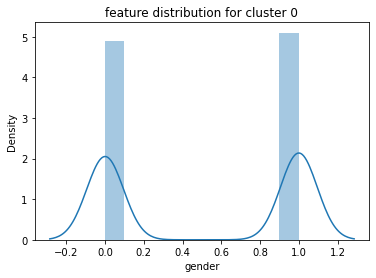

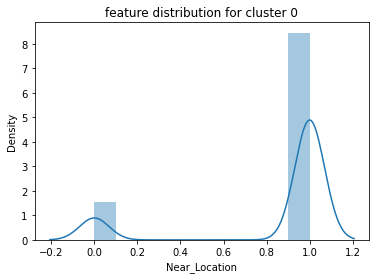

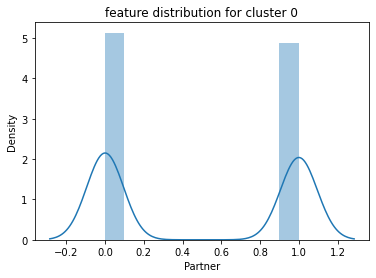

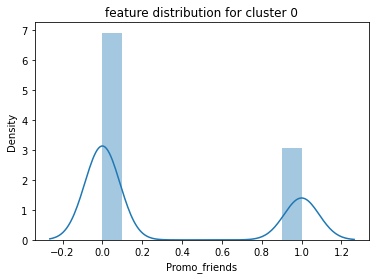

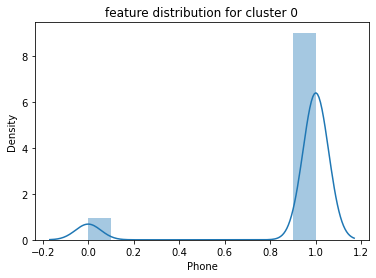

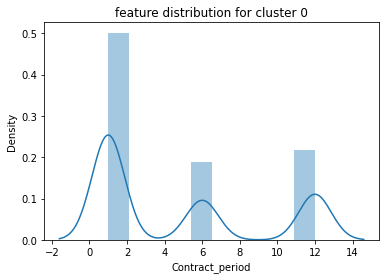

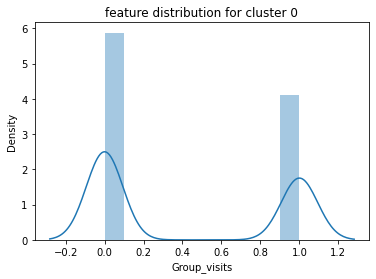

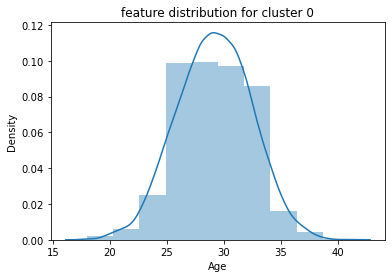

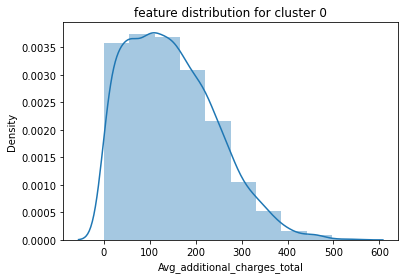

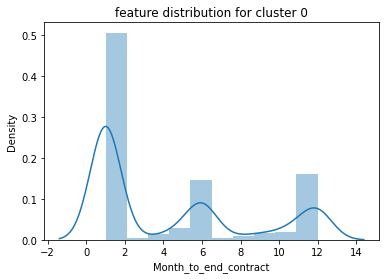

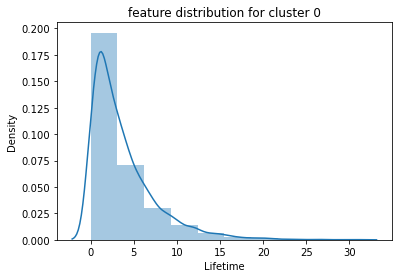

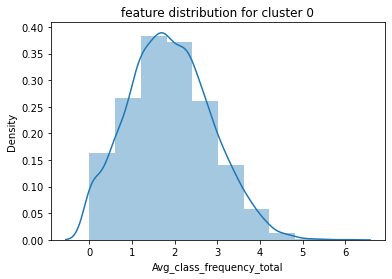

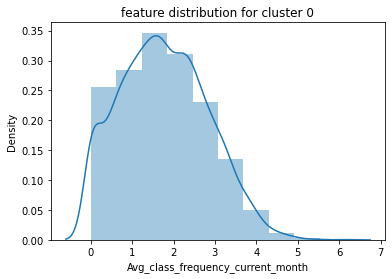

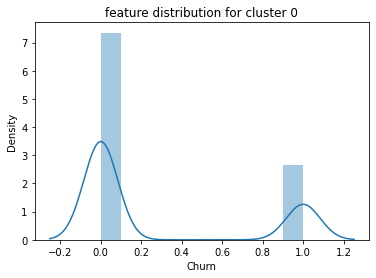

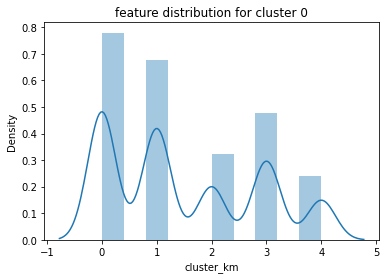

In [16]:
distplot_clusters(gym, 0)

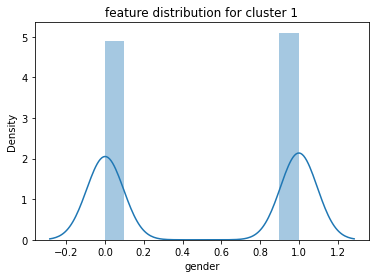

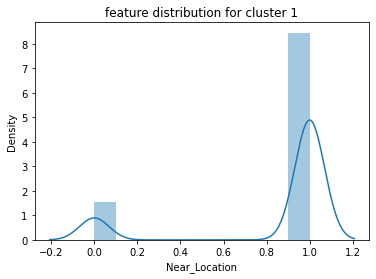

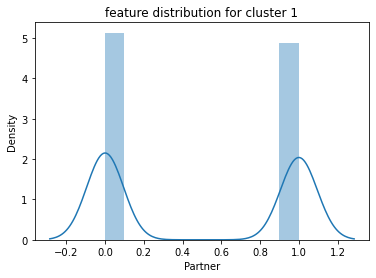

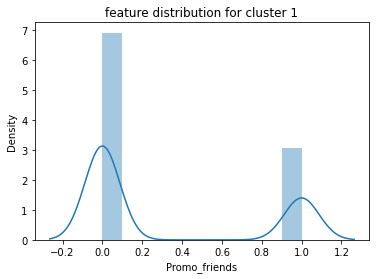

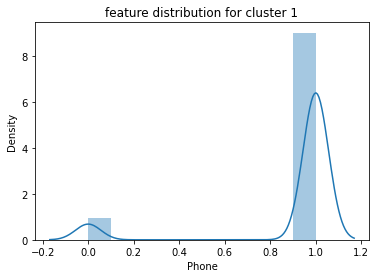

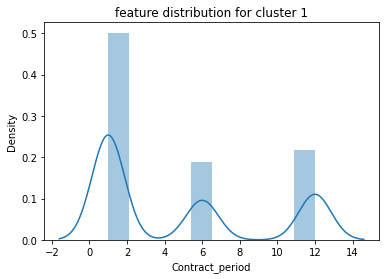

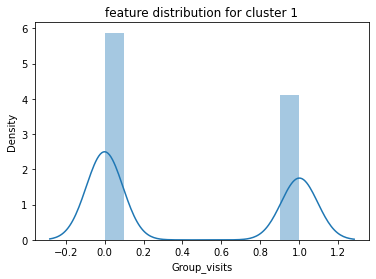

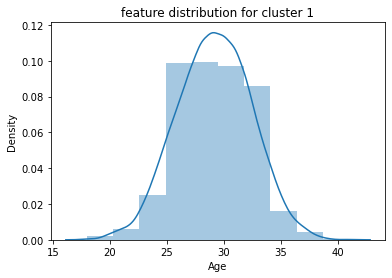

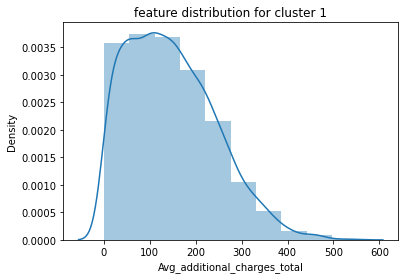

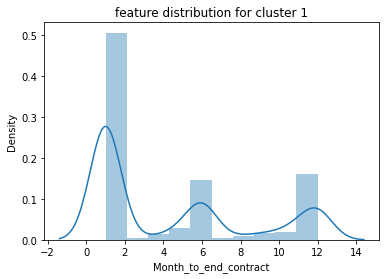

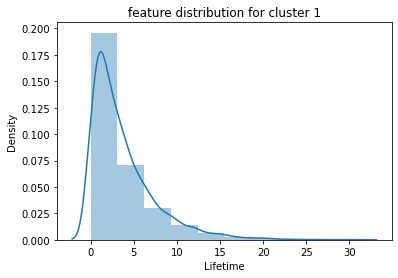

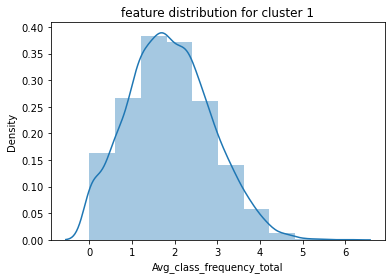

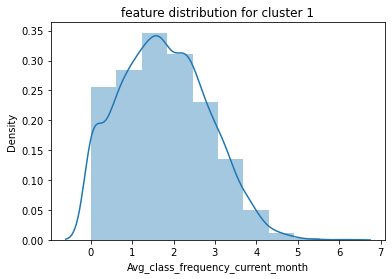

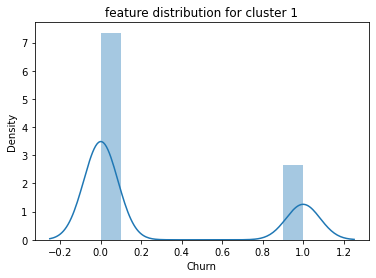

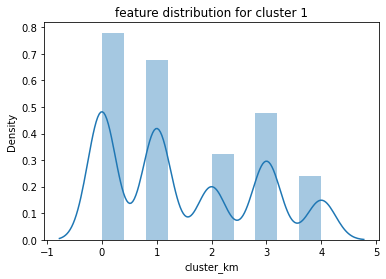

In [17]:
distplot_clusters(gym, 1)

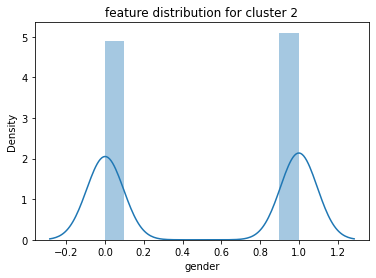

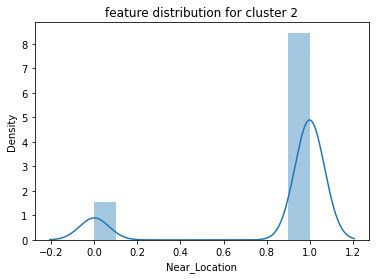

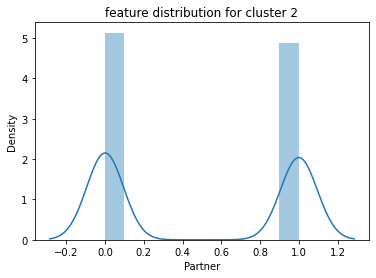

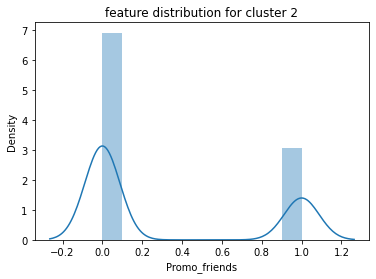

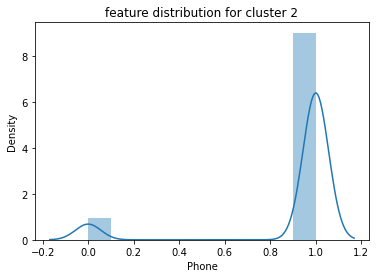

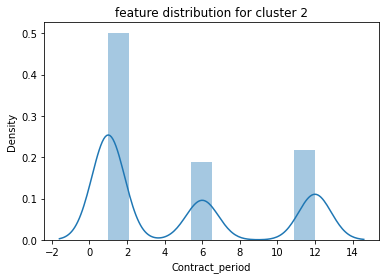

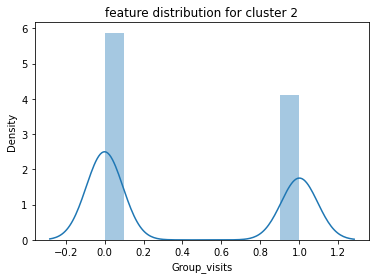

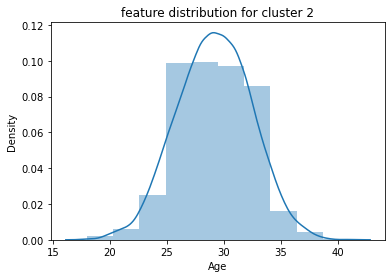

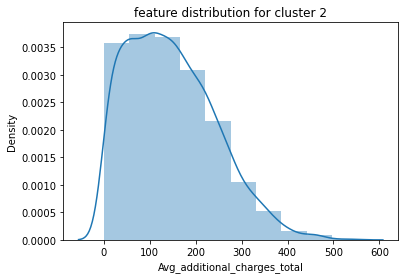

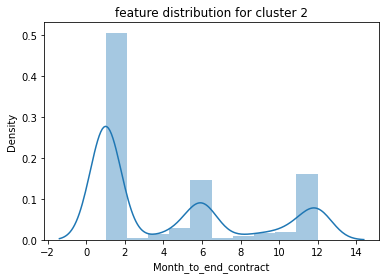

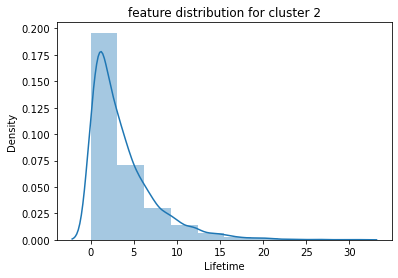

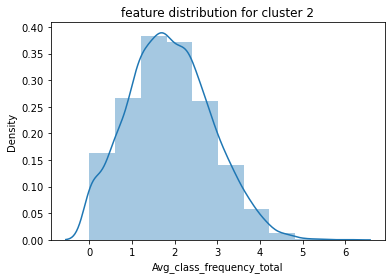

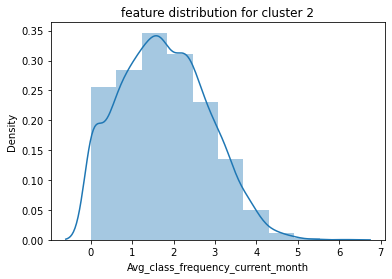

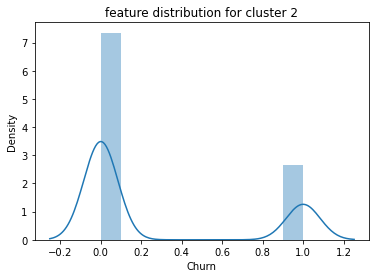

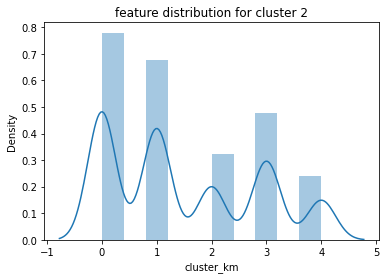

In [18]:
distplot_clusters(gym, 2)

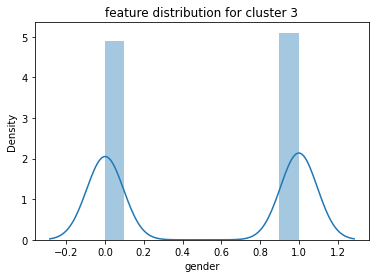

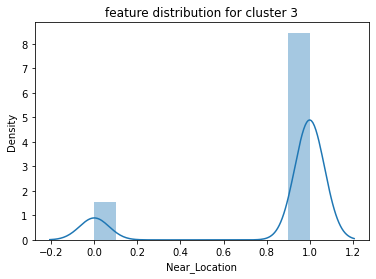

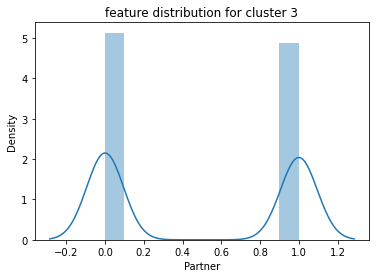

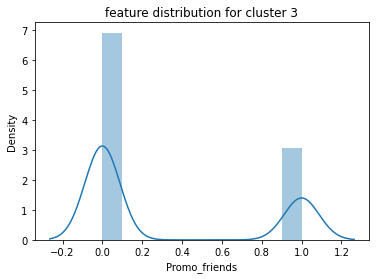

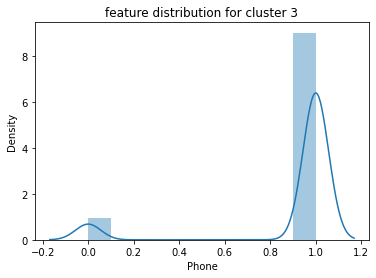

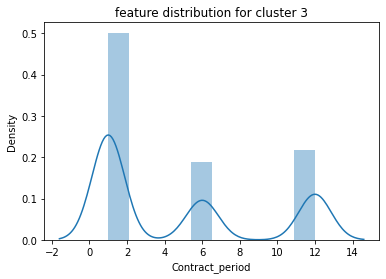

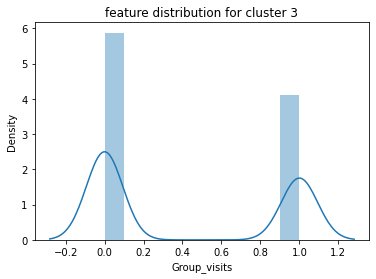

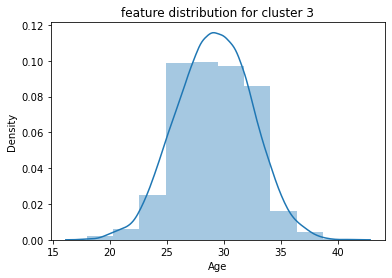

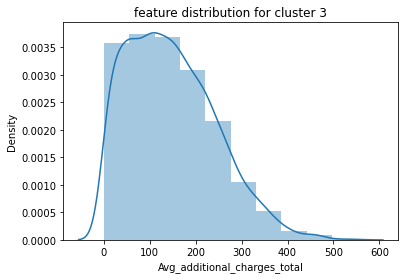

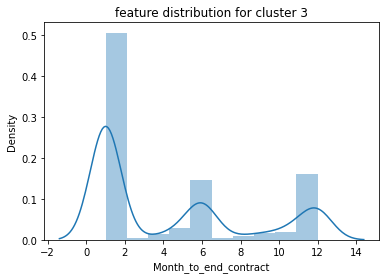

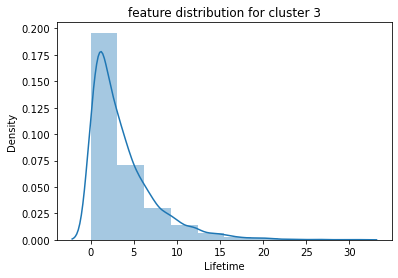

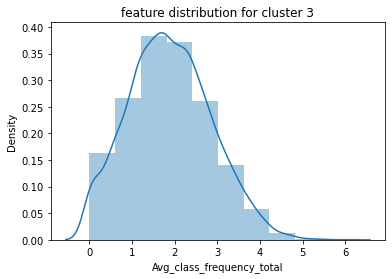

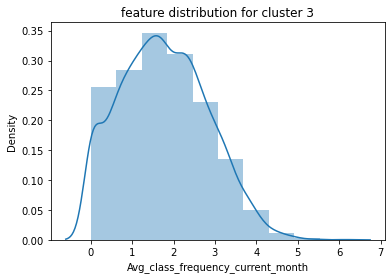

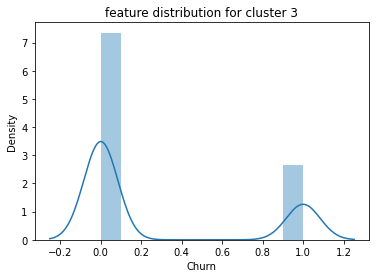

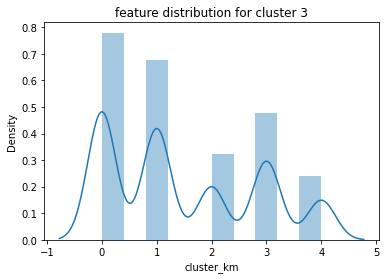

In [19]:
distplot_clusters(gym, 3)

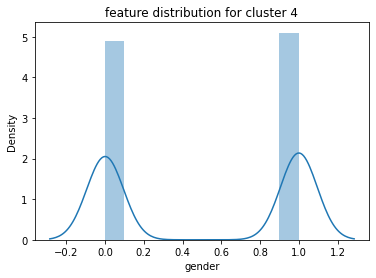

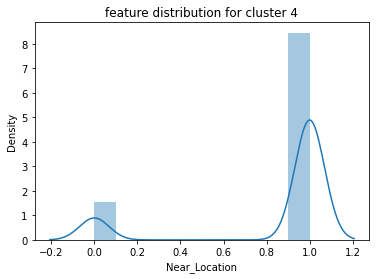

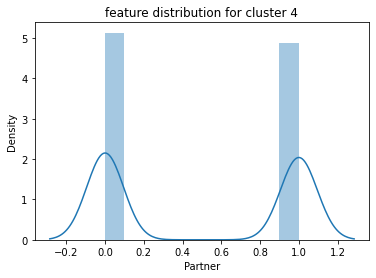

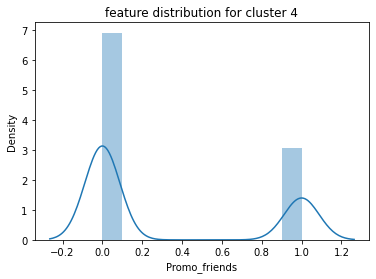

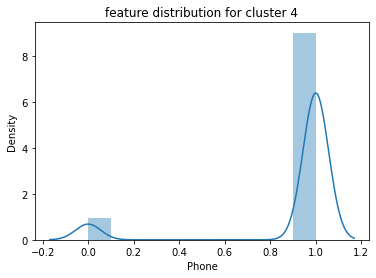

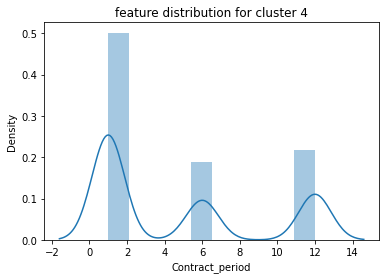

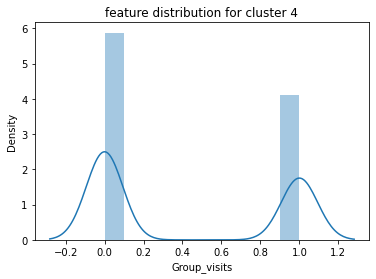

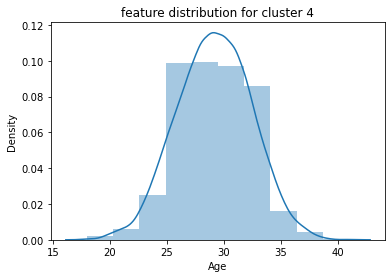

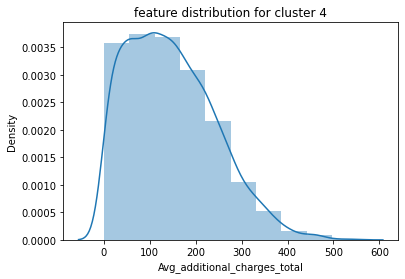

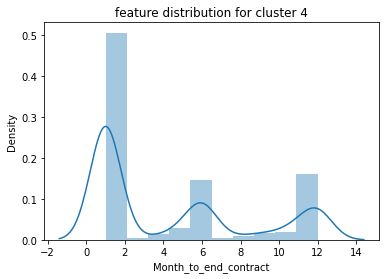

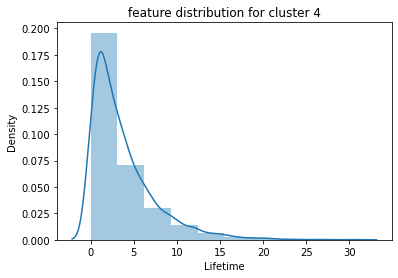

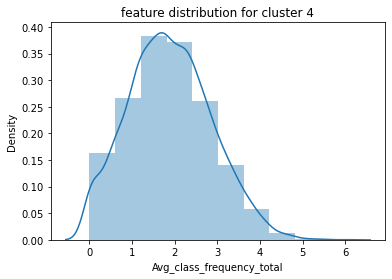

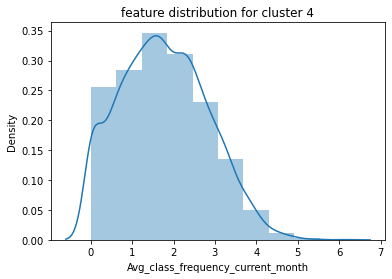

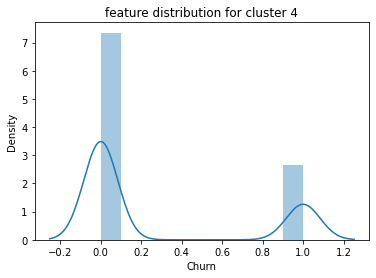

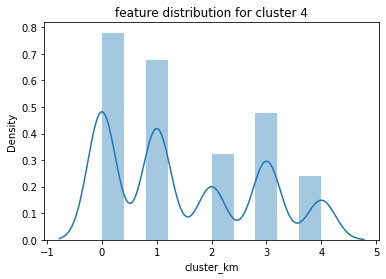

In [20]:
distplot_clusters(gym, 4)

In [21]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()

In [22]:
# calculating the churn rate for each cluster
def cluster_churn(cluster_km):
    cluster = gym.query('cluster_km == {}'.format(cluster_km))
    Churn_rate = cluster['Churn'].value_counts() / cluster.shape[0]
    Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                       , Churn_rate.values
                       , 'Customers'
                       , 'Percentage'
                       , 'Customer Distribution for Cluster {}'.format(cluster_km))
    print(Churn_rate)

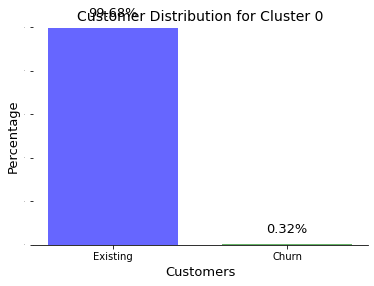

0    0.996792
1    0.003208
Name: Churn, dtype: float64


In [23]:
cluster_churn(0)

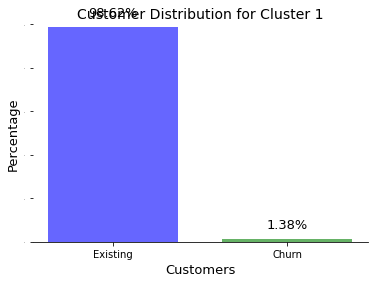

0    0.986162
1    0.013838
Name: Churn, dtype: float64


In [24]:
cluster_churn(1)

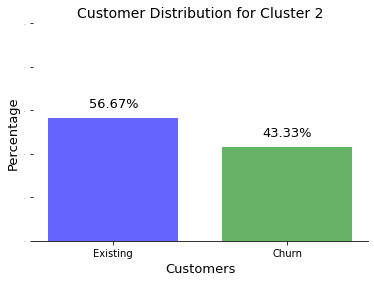

0    0.566731
1    0.433269
Name: Churn, dtype: float64


In [25]:
cluster_churn(2)

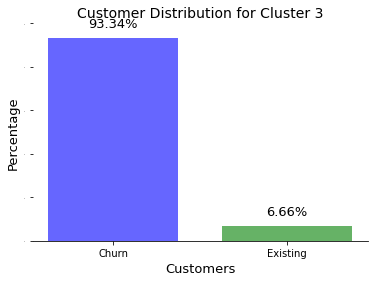

1    0.93342
0    0.06658
Name: Churn, dtype: float64


In [26]:
cluster_churn(3)

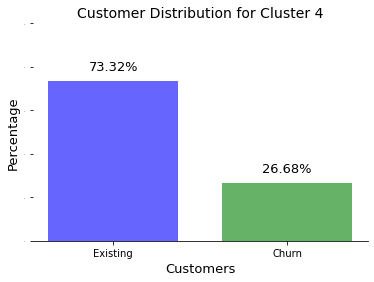

0    0.733161
1    0.266839
Name: Churn, dtype: float64


In [27]:
cluster_churn(4)

### Conclusion

Looking at the mean feature values for clusters, there are features that have a mean value of zero. When observing the distributions of features for the clusters, the graphs all look the same from cluster to cluster. Furthermore, the churn rate differs for each cluster. There is this much churn by cluster: 0.71% cluster 0, 1.55% cluster 1, 0.12% cluster 2, 0.21% cluster 3, 26.18% cluster 4. According to the data, customers are more prone to leaving from cluster 4 and clusters 0, 1, 2, and 3 have more loyal customers.

## Overall conclusions and basic recommendations

Upon studying the data, the more loyal customers belong to cluster 2 (0.12% churn). A recommendation regarding customer interaction could be to periodically promote the "Bring a Friend" offer since that could encourage both the customer and their friend to go to the customer's gym. According to the mean feature value for location, it would seem that a customer is more likely to be loyal if the gym is near where they live or work. Another strategy for customer interaction and retention could be to offer periodic discounted 3-month contract periods. The data suggests that customers spend an average of an additional $154 on other gym services. Having discounted contract periods could entice more customers to utilize the gym for the gym services from the money saved. In like fashion, consideration for including certain free gym services to the contracts might also boost retention as well as increase the likelihood a customer might purchase longer-termed contract periods.